In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("cell_images"))
import glob
import cv2
import tensorflow as tf
from keras import layers
from keras.layers import Dropout , Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model
from keras.initializers import glorot_uniform
from sklearn.model_selection import train_test_split
import keras.backend as K
from sklearn.utils import shuffle
# Any results you write to the current directory are saved as output.

['cell_images', 'Parasitized', 'Parasitized_', 'Uninfected', 'uninfected_']


Using TensorFlow backend.


In [3]:
X_para = []
Y_para = []
myfiles = glob.glob("cell_images/Parasitized/*.png")
for file in myfiles:
    kernel = np.array([[0,-1,0],[-1,6,-1],[0,-1,0]])
    img = cv2.filter2D( cv2.resize(cv2.imread(file) , (120,120)) , -1 , kernel)
    image_yuv = cv2.cvtColor(img ,cv2.COLOR_BGR2YUV )
    image_yuv[: ,: , 0] = cv2.equalizeHist(image_yuv[:,:,0])
    image = cv2.cvtColor(image_yuv , cv2.COLOR_YUV2RGB)
    X_para.append(image)
    Y_para.append(1)
    


In [4]:
X_un , Y_un = [],[]
unfiles = glob.glob("cell_images/Uninfected/*.png")
for file in unfiles:
    kernel = np.array([[0,-1,0],[-1,7,-1],[0,-1,0]])
    img = cv2.filter2D( cv2.resize(cv2.imread(file) , (120,120)) , -1 , kernel)
    X_un.append(img)
    Y_un.append(0)

    

In [5]:
X = X_para + X_un
Y = Y_para + Y_un
X,Y = shuffle = (X,Y)
#X,Y = shuffle = (X,Y)
#X,Y = shuffle = (X,Y)
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3 , random_state =42)
X = np.array(X)


In [6]:
inp = Input(shape = (120 , 120 , 3))
x = Conv2D(filters = 16 , kernel_size = (3,3) , strides = (1,1) , padding = "valid" , kernel_initializer=glorot_uniform(seed = 2))(inp)
x = Activation("relu")(x)
x = Dropout(0.2)(x)
x = Conv2D(filters = 32 , kernel_size = (4,4) , strides = (2,2) , padding = "valid" , kernel_initializer=glorot_uniform(seed = 2))(x)
x = Activation("relu")(x)
x = MaxPooling2D(pool_size = (2,2) , strides = (2,2) , padding = "valid")(x)
x = Dropout(0.2)(x)
x = Conv2D(filters = 64 , kernel_size = (3,3) , strides = (2,2) , padding = "valid" , kernel_initializer = glorot_uniform(seed = 2))(x)
x = Activation("relu")(x)
x = Dropout(0.2)(x)
x = Conv2D(filters = 128 , kernel_size = (3,3) , strides = (1,1) , padding = "valid" , kernel_initializer = glorot_uniform())(x)
x = Activation("relu")(x)
x = MaxPooling2D(pool_size = (2,2) , strides = (2,2) , padding = "valid")(x)
x = Dropout(0.2)(x)
x = Conv2D(filters = 256 , kernel_size = (2,2) , strides = (2,2) , padding = "valid" , kernel_initializer = glorot_uniform())(x)
x = Activation("relu")(x)
x = AveragePooling2D(pool_size = (3,3) , strides = (1,1) , padding = "valid")(x)
x = Dropout(0.2)(x)
x = Flatten()(x)
x = Dense(120)(x)
x = Activation("relu")(x)
x = Dropout(0.2)(x)
x = Dense(60)(x)
x = Activation("relu")(x)
x = Dropout(0.2)(x)
x = Dense(10)(x)
x = Activation("relu")(x)
x = Dropout(0.)(x)
x = Dense(1)(x)
output = Activation("sigmoid")(x)
model  = Model(inputs =inp , outputs = output )

In [7]:
model.compile(loss = "binary_crossentropy" , optimizer = "adam" , metrics = ["accuracy"])
history = model.fit(np.array(X_train) ,np.array(Y_train) , epochs = 13 ,validation_split = 0.2 )

Train on 11012 samples, validate on 2754 samples
Epoch 1/13
11012/11012 [==============================] - 234s 21ms/step - loss: 0.7562 - accuracy: 0.4978 - val_loss: 0.6932 - val_accuracy: 0.5011
Epoch 2/13
11012/11012 [==============================] - 245s 22ms/step - loss: 0.6933 - accuracy: 0.5081 - val_loss: 0.6932 - val_accuracy: 0.5011
Epoch 3/13
11012/11012 [==============================] - 244s 22ms/step - loss: 0.6898 - accuracy: 0.5064 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 4/13
11012/11012 [==============================] - 243s 22ms/step - loss: 0.3327 - accuracy: 0.8375 - val_loss: 0.0572 - val_accuracy: 0.9840
Epoch 5/13
11012/11012 [==============================] - 243s 22ms/step - loss: 0.0745 - accuracy: 0.9831 - val_loss: 0.0335 - val_accuracy: 0.9916
Epoch 6/13
11012/11012 [==============================] - 243s 22ms/step - loss: 0.0449 - accuracy: 0.9884 - val_loss: 0.0261 - val_accuracy: 0.9931
Epoch 7/13
11012/11012 [==============================] -

In [10]:
y_pre = model.predict(np.array(X_test))
#y_pre = np.reshape(y_pre ,(8268,) )
Y_test = np.array(Y_test)
fil = y_pre > 0.8
y_pre[fil] = 1
fil = y_pre < 0.8
y_pre[fil] = 0
np.sum(Y_test == y_pre)/8268

2106.5391872278665

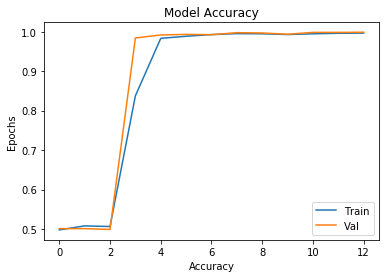

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel("Accuracy")
plt.ylabel("Epochs")
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

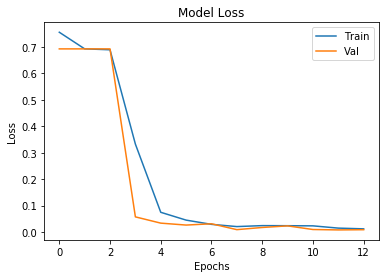

In [15]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

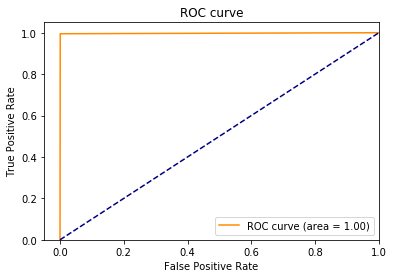

In [25]:
from sklearn.metrics import roc_curve,auc

fpr, tpr, _ = roc_curve(Y_test, y_pre)

probs = np.exp(y_pre)
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, probs, pos_label=1)

roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)

plt.title('ROC curve')
plt.xlim(-0.05, 1)
plt.ylim(0, 1.05)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.show()

In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, y_pre)

0.997119132350449

In [20]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(Y_test, y_pre))

[[2887    2]
 [  15 2997]]
